In [5]:
import numpy as np
import math

## [Problem 1-2]

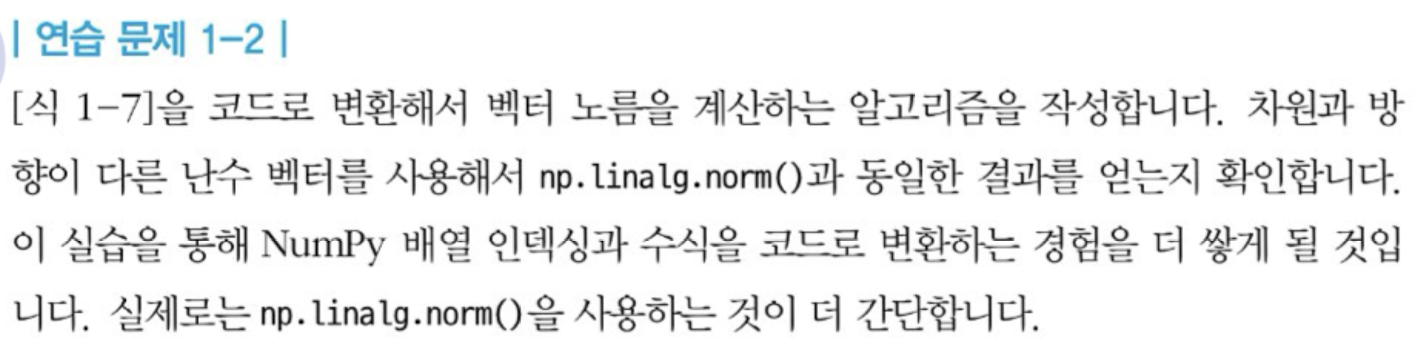

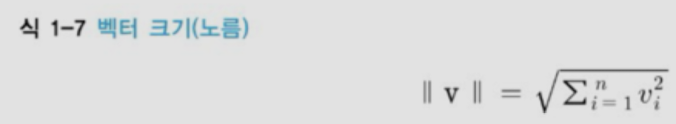

In [6]:
# random number generation
rand_num = np.random.randint(2, 10)
v = np.random.randn(rand_num, 1)
v

array([[1.57160299],
       [1.60364879],
       [0.62896798],
       [1.51761046],
       [1.5819511 ]])

In [7]:
v_norm = 0
for i in range(len(v)):
  v_norm += v[i]**2

# v_norm = v_norm.item() # array인 v_norm을 상수로 바꿔주도록
v_norm = math.sqrt(v_norm)
v_norm

<ipython-input-7-b19c3367190a>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_norm = math.sqrt(v_norm)


3.2004588576351045



---



In [8]:
np.linalg.norm(v) == v_norm

True

## [Problem 1-5] (좀 더 잘 풀 수 있을듯)

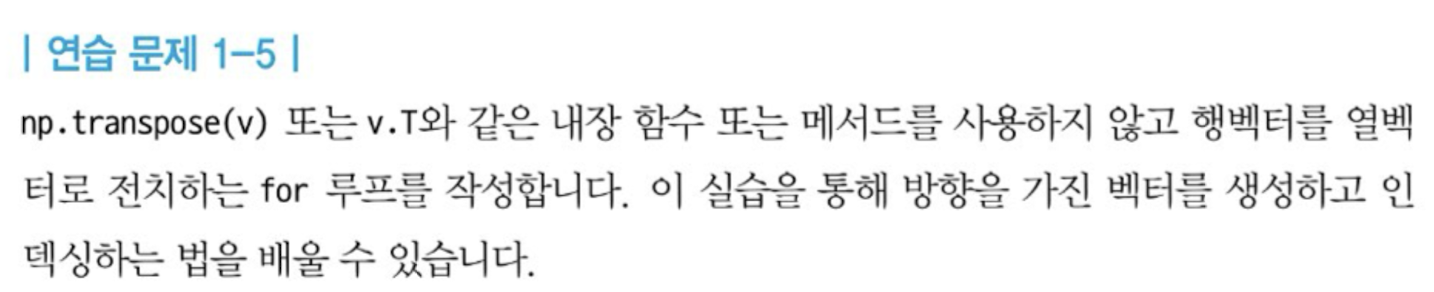

In [9]:
v # column vector

# v.shape

array([[1.57160299],
       [1.60364879],
       [0.62896798],
       [1.51761046],
       [1.5819511 ]])

In [10]:
w = np.random.rand(1, len(v))

for i in range(rand_num):
  w[0, i] = v[i, 0]

w # row vector

array([[1.57160299, 1.60364879, 0.62896798, 1.51761046, 1.5819511 ]])

In [11]:
v.T == w

array([[ True,  True,  True,  True,  True]])

## [Problem 1-6]

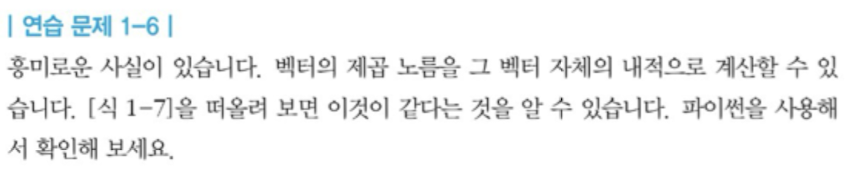

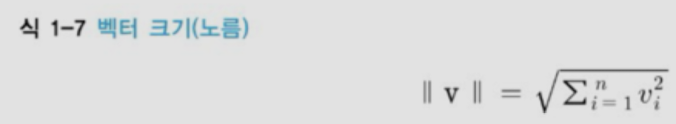

In [12]:
# calcauting norm
v_norm = math.sqrt(np.dot(v.T, v))
v_norm

np.linalg.norm(v) == v_norm

<ipython-input-12-b2fdb2f9630c>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_norm = math.sqrt(np.dot(v.T, v))


True

## [Problem 1-7]

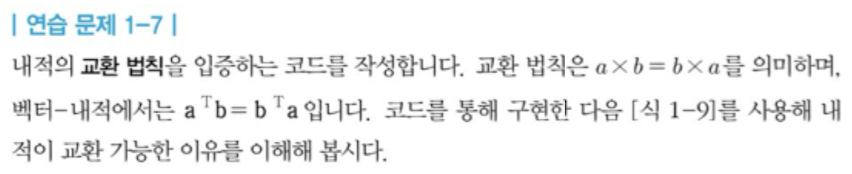

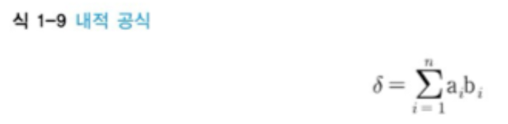

### 코드 구현

In [13]:
a = np.random.randn(5, 1)
b = np.random.randn(5, 1)

print(f'vector a = \n{a}\n \n \n vector b = \n{b}')

vector a = 
[[-0.06876321]
 [-0.44979081]
 [-1.79450753]
 [ 0.6327736 ]
 [-0.11635293]]
 
 
 vector b = 
[[ 0.56865973]
 [ 1.36018018]
 [-0.06521751]
 [ 1.03389795]
 [-0.86988086]]


In [14]:
np.dot(a.T, b) == np.dot(b.T, a) # True

array([[ True]])

### 식 1-9를 통한 이해 ↑

- 상응하는 원소끼리 곱한 것들의 합이니까 당연 성립
- $(a_1 \cdot b_1) + (a_2 \cdot b_2) + \cdots + (a_n \cdot b_n) = (b_1 \cdot a_1) + (b_2 \cdot a_2) + \cdots + (b_n \cdot a_n)$
  - $\because$ 상수의 교환 법칙에 의해 벡터 내적의 교환 법칙도 성립함을 알 수 있다.

## [Problem 1-9] 직교벡터 분해 구현

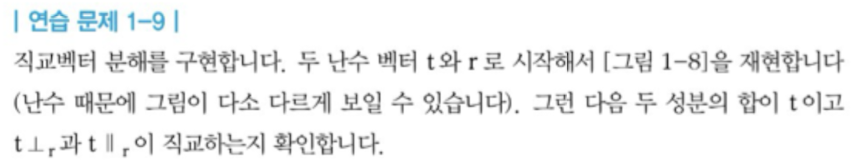

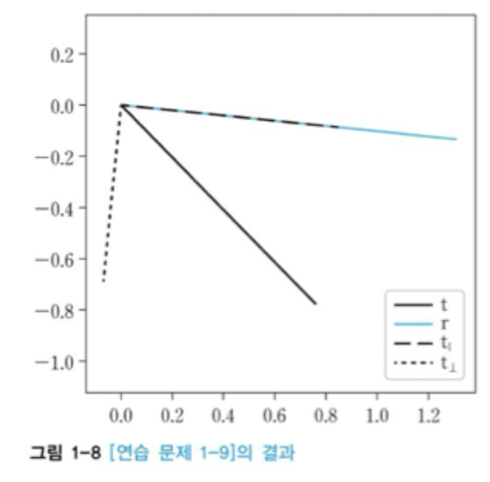

In [22]:
t = np.random.randn(2, 1)
r = np.random.randn(2, 1)

print(f't = \n{t}')
print('')
print(f'r = \n{r}')

t = 
[[-0.07700605]
 [ 0.75993356]]

r = 
[[-2.39379085]
 [ 1.48086   ]]


In [23]:
beta = (np.dot(r.T, t) / np.dot(r.T, r)).item()

t_parrel = beta * r

t_ortho = t - t_parrel

In [24]:
round((np.dot(t_parrel.T, t_ortho)).item(), 3) # 거의 0

-0.0

In [25]:
# 시각화
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D # 범례 추가

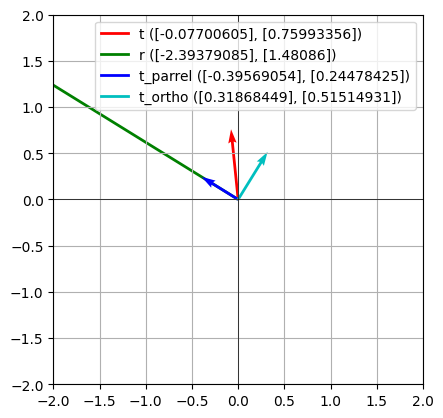

In [27]:
# 좌표평면의 축을 설정
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# 벡터의 시작 좌표 (x, y)와 방향 벡터 (u, v)
X = [0, 0, 0, 0]  # 시작 x 좌표들
Y = [0, 0, 0, 0]  # 시작 y 좌표들

U = [t[0], r[0], t_parrel[0], t_ortho[0]]  # x 방향으로의 벡터 값들 t, r, t_parrel, t_ortho
V = [t[1], r[1], t_parrel[1], t_ortho[1]]  # y 방향으로의 벡터 값들 t, r, t_parrel, t_ortho

# 벡터를 화살표로 그리기
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color=['r', 'g', 'b', 'c'])

# 벡터에 레이블 추가
legend_elements = [Line2D([0], [0], color='r', lw=2, label=f't ({U[0]}, {V[0]})'),
                   Line2D([0], [0], color='g', lw=2, label=f'r ({U[1]}, {V[1]})'),
                   Line2D([0], [0], color='b', lw=2, label=f't_parrel ({U[2]}, {V[2]})'),
                   Line2D([0], [0], color='c', lw=2, label=f't_ortho ({U[3]}, {V[3]})')]

# 범례 추가
plt.legend(handles=legend_elements)

# 그래프 범위 설정
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# 그리기
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()